In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot

In [2]:
# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=0)
    # retrive array
    dataset = data.values
    # split into input and output varriables
    X = dataset[:, :-1]
    y = dataset[:, -1]
    # format all fields as string
    X = X.astype(str)
    return X, y

In [3]:
# prepare inpute data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [4]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [5]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [6]:
# load the dataset
X, y = load_dataset('breast-cancer.csv')

In [7]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [8]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [9]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [10]:
# faeture selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [11]:
# what scores for the features
for i in range(len(fs.scores_)):
    print('FAETURE %d: %f' % (i, fs.scores_[i]))

FAETURE 0: 0.282942
FAETURE 1: 0.056225
FAETURE 2: 6.851490
FAETURE 3: 67.695550
FAETURE 4: 10.681429
FAETURE 5: 6.580570
FAETURE 6: 0.218149
FAETURE 7: 0.672520
FAETURE 8: 7.792699


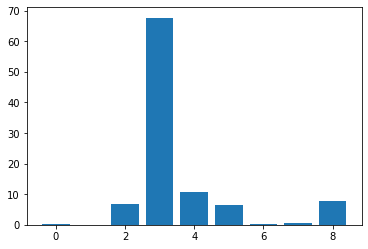

In [12]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()